In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import yfinance as yf

In [30]:
df = yf.download('^NSEI',start='2000-01-01',end='2024-06-27')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0


In [38]:
df.columns = df.columns.str.lower()

In [32]:
df.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'volume'], dtype='object')

In [33]:
df.drop(['adj close'],axis=1,inplace=True)

In [34]:
df.tail()

,open,high,low,close,volume
Date,,,,,
2024-06-20,23586.150391,23624.000000,23442.599609,23567.000000,280300
2024-06-21,23661.150391,23667.099609,23398.199219,23501.099609,609900
2024-06-24,23382.300781,23558.099609,23350.000000,23537.849609,239400
2024-06-25,23577.099609,23754.150391,23562.050781,23721.300781,298100
2024-06-26,23723.099609,23889.900391,23670.449219,23868.800781,287800


<Axes: xlabel='Date'>

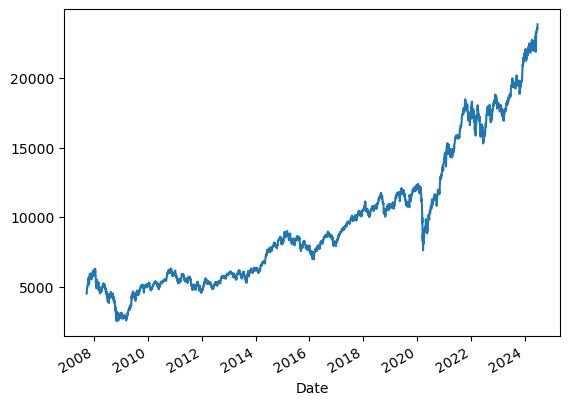

In [35]:
df['close'].plot()

In [36]:
df = df.reset_index()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4110 non-null   datetime64[ns]
 1   open    4110 non-null   float64       
 2   high    4110 non-null   float64       
 3   low     4110 non-null   float64       
 4   close   4110 non-null   float64       
 5   volume  4110 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 192.8 KB


In [48]:
df['year']=df['date'].dt.year

In [49]:
df['month'] = df['date'].dt.month

In [57]:
df['weekday'] = df['date'].dt.day_name()

In [58]:
df.head()

,date,open,high,low,close,volume,year,month,weekday
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,0,2007,9,Monday
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0,2007,9,Tuesday
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0,2007,9,Wednesday
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0,2007,9,Thursday
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0,2007,9,Friday


<Axes: xlabel='year'>

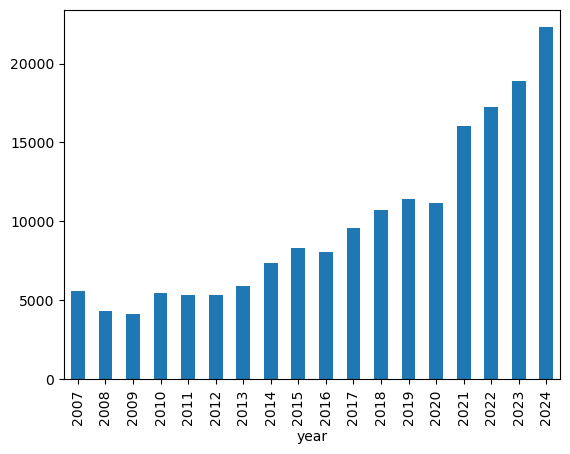

In [61]:
df.groupby('year')['close'].mean().plot(kind='bar')

In [66]:
df.head(5)['close'],df.close.shift(1).head(5)

(0    4494.649902
 1    4546.200195
 2    4732.350098
 3    4747.549805
 4    4837.549805
 Name: close, dtype: float64,
 0            NaN
 1    4494.649902
 2    4546.200195
 3    4732.350098
 4    4747.549805
 Name: close, dtype: float64)

In [67]:
df['prv close'] = df.close.shift(1)

In [68]:
df.head()

,date,open,high,low,close,volume,year,month,weekday,prv close
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,0,2007,9,Monday,NaN
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0,2007,9,Tuesday,4494.649902
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0,2007,9,Wednesday,4546.200195
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0,2007,9,Thursday,4732.350098
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0,2007,9,Friday,4747.549805


In [69]:
df['change'] = round(((df['close']-df['prv close'])/df['prv close'])*100,2)

In [72]:
df.sample(10)

,date,open,high,low,close,volume,year,month,weekday,prv close,change
3579,2022-05-02,16924.449219,17092.250000,16917.250000,17069.099609,278200,2022,5,Monday,17102.550781,-0.20
3730,2022-12-08,18570.849609,18625.000000,18536.949219,18609.349609,202800,2022,12,Thursday,18560.500000,0.26
2933,2019-09-19,10845.200195,10845.200195,10670.250000,10704.799805,642600,2019,9,Thursday,10840.650391,-1.25
611,2010-03-23,5205.850098,5243.600098,5193.399902,5225.299805,0,2010,3,Tuesday,5205.200195,0.39
1540,2014-01-03,6194.549805,6221.700195,6171.250000,6211.149902,139000,2014,1,Friday,6221.149902,-0.16
831,2011-02-04,5519.899902,5556.299805,5369.049805,5395.750000,0,2011,2,Friday,5526.750000,-2.37
720,2010-08-26,5462.100098,5486.549805,5454.700195,5477.899902,0,2010,8,Thursday,5462.350098,0.28
1828,2015-03-17,8689.099609,8742.549805,8630.799805,8723.299805,177000,2015,3,Tuesday,8633.150391,1.04
435,2009-07-02,4373.500000,4383.649902,4288.750000,4348.850098,0,2009,7,Thursday,4340.899902,0.18
1171,2012-06-29,5191.250000,5286.250000,5189.000000,5278.899902,0,2012,6,Friday,5149.149902,2.52


<Axes: xlabel='change', ylabel='Count'>

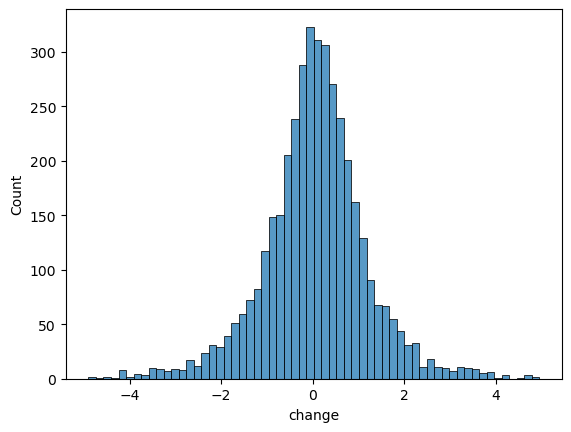

In [79]:
sns.histplot(data=df.loc[(df.change<5)&(df.change>-5) ],x='change',bins=60)

In [85]:
df.groupby('weekday')['change'].mean().sort_values()

weekday
Thursday    -0.016991
Monday       0.008427
Tuesday      0.076634
Friday       0.076716
Wednesday    0.103089
Name: change, dtype: float64

In [86]:
df.head()

,date,open,high,low,close,volume,year,month,weekday,prv close,change
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,0,2007,9,Monday,NaN,NaN
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0,2007,9,Tuesday,4494.649902,1.15
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0,2007,9,Wednesday,4546.200195,4.09
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0,2007,9,Thursday,4732.350098,0.32
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0,2007,9,Friday,4747.549805,1.90


In [88]:
df['range'] = (df['high']-df['low'])/df['low']*100

<Axes: xlabel='range', ylabel='Count'>

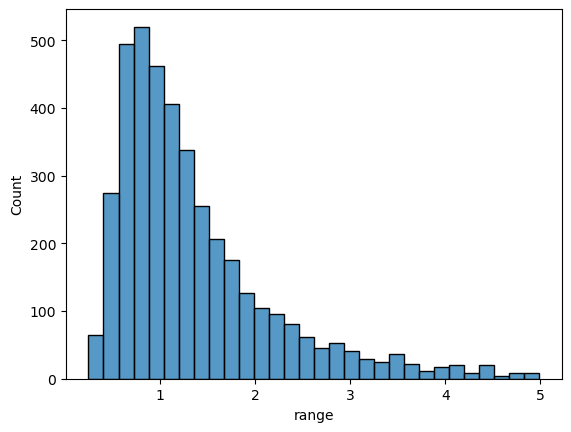

In [91]:
sns.histplot(data = df.loc[df['range']<5],x='range',bins=30)

In [127]:
df['jc']=abs(df['change'])

In [129]:
df.groupby('weekday')['jc'].mean()

weekday
Friday       0.935037
Monday       1.019207
Thursday     0.842473
Tuesday      0.824915
Wednesday    0.832103
Name: jc, dtype: float64

In [130]:
df.jc.mean()

0.8903601849598443

In [131]:
df.head()

,date,open,high,low,close,volume,year,month,weekday,prv close,change,range,jc
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,0,2007,9,Monday,NaN,NaN,1.476733,NaN
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0,2007,9,Tuesday,4494.649902,1.15,1.567538,1.15
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0,2007,9,Wednesday,4546.200195,4.09,4.148124,4.09
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0,2007,9,Thursday,4732.350098,0.32,0.840901,0.32
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0,2007,9,Friday,4747.549805,1.90,2.577265,1.90


In [132]:
df['night'] = df.close - df.open

<Axes: xlabel='night', ylabel='Count'>

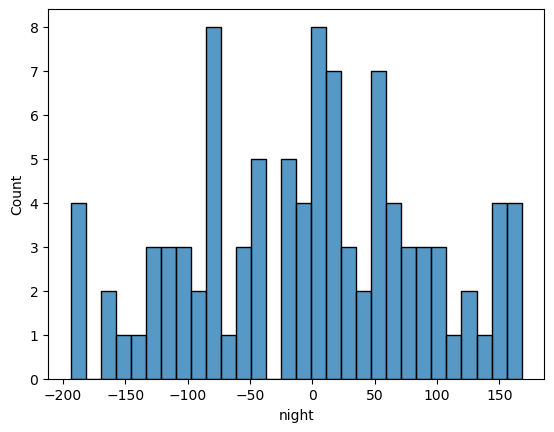

In [146]:
rangee = 200
year = 2024
sns.histplot(data=df.loc[
    (df['night']>-rangee) & 
    (df['night']<rangee) &
    (df['year']==year)]
             ,x='night',bins=30)

I found that most of the time the nifty opens on the range of -100 to +100 

In [140]:
df.head(2).T

,0,1
date,2007-09-17 00:00:00,2007-09-18 00:00:00
open,4518.450195,4494.100098
high,4549.049805,4551.799805
low,4482.850098,4481.549805
close,4494.649902,4546.200195
volume,0,0
year,2007,2007
month,9,9
weekday,Monday,Tuesday
prv close,NaN,4494.649902
